# Keras Syntax Basics

With TensorFlow 2.0 

## The Data

Simple fake data set

Let's pretend  measurements of some rare gem stones, with 2 measurement features and a sale price. Final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

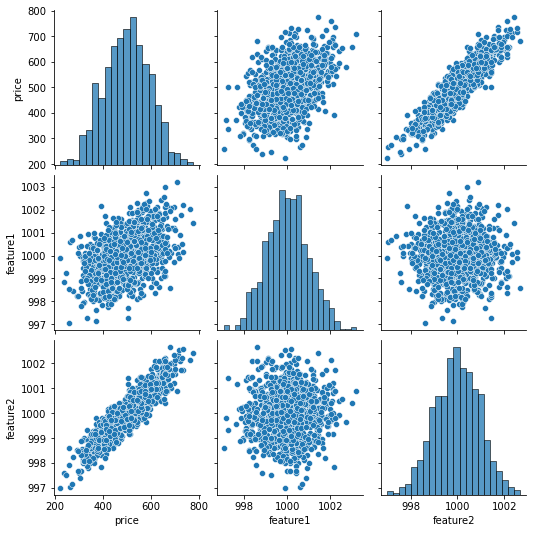

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [16]:
scaler = MinMaxScaler()

In [17]:
# Notice to prevent data leakage from the test set, only fit our scaler to the training set

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [24]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [25]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [26]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [27]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 2s 2ms/sample - loss: 256738.2625
Epoch 2/250
700/700 [==============================] - 0s 68us/sample - loss: 256692.9721
Epoch 3/250
700/700 [==============================] - 0s 78us/sample - loss: 256650.6871
Epoch 4/250
700/700 [==============================] - 0s 85us/sample - loss: 256570.3761
Epoch 5/250
700/700 [==============================] - 0s 99us/sample - loss: 256495.0437s - loss: 257419.71
Epoch 6/250
700/700 [==============================] - 0s 86us/sample - loss: 256415.0366
Epoch 7/250
700/700 [==============================] - 0s 91us/sample - loss: 256324.0026
Epoch 8/250
700/700 [==============================] - 0s 88us/sample - loss: 256220.9616
Epoch 9/250
700/700 [==============================] - 0s 74us/sample - loss: 256106.8146
Epoch 10/250
700/700 [==============================] - 0s 62us/sample - loss: 255982.5529
Epoch 11/250
700/700 [==============================] - 0s 7

700/700 [==============================] - 0s 73us/sample - loss: 105326.8726
Epoch 91/250
700/700 [==============================] - 0s 77us/sample - loss: 100667.5099
Epoch 92/250
700/700 [==============================] - 0s 89us/sample - loss: 95993.2739
Epoch 93/250
700/700 [==============================] - 0s 80us/sample - loss: 91293.1907
Epoch 94/250
700/700 [==============================] - 0s 69us/sample - loss: 86564.2436
Epoch 95/250
700/700 [==============================] - 0s 54us/sample - loss: 81826.9746
Epoch 96/250
700/700 [==============================] - 0s 61us/sample - loss: 77115.8974
Epoch 97/250
700/700 [==============================] - 0s 60us/sample - loss: 72434.9679
Epoch 98/250
700/700 [==============================] - 0s 60us/sample - loss: 67780.6342
Epoch 99/250
700/700 [==============================] - 0s 69us/sample - loss: 63136.1887
Epoch 100/250
700/700 [==============================] - 0s 66us/sample - loss: 58533.7877
Epoch 101/250
700/70

Epoch 181/250
700/700 [==============================] - 0s 64us/sample - loss: 662.4738
Epoch 182/250
700/700 [==============================] - 0s 73us/sample - loss: 642.7098
Epoch 183/250
700/700 [==============================] - 0s 58us/sample - loss: 623.6707
Epoch 184/250
700/700 [==============================] - 0s 62us/sample - loss: 605.3594
Epoch 185/250
700/700 [==============================] - 0s 64us/sample - loss: 588.6494
Epoch 186/250
700/700 [==============================] - 0s 71us/sample - loss: 571.2278
Epoch 187/250
700/700 [==============================] - 0s 87us/sample - loss: 553.9643
Epoch 188/250
700/700 [==============================] - 0s 90us/sample - loss: 540.8268
Epoch 189/250
700/700 [==============================] - 0s 89us/sample - loss: 523.0170
Epoch 190/250
700/700 [==============================] - 0s 89us/sample - loss: 508.0972
Epoch 191/250
700/700 [==============================] - 0s 89us/sample - loss: 489.7375
Epoch 192/250
700/700

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [31]:
pd.DataFrame(model.history.history)

,loss
0,256738.262500
1,256692.972143
2,256650.687054
3,256570.376071
4,256495.043750
...,...
245,31.306677
246,30.487622
247,29.703302
248,28.992177


In [35]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

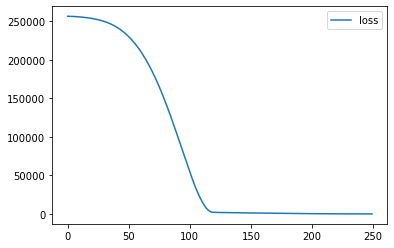

In [41]:
loss.plot()

### Compare final evaluation (MSE) on training set and test set.


In [42]:
model.metrics_names

['loss']

In [43]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [44]:
training_score
# Error

27.646867141723632

In [45]:
test_score
# Mean squared Error

28.29146525065104

### Further Evaluations

In [56]:
test_predictions = model.predict(X_test)

In [57]:
test_predictions

array([[407.38898],
       [621.3392 ],
       [590.33496],
       [571.52795],
       [370.41757],
       [577.9931 ],
       [515.90326],
       [459.77786],
       [548.98285],
       [448.3439 ],
       [609.79395],
       [547.2839 ],
       [420.99844],
       [411.11813],
       [647.5166 ],
       [438.50357],
       [507.74182],
       [657.8177 ],
       [659.9587 ],
       [564.10583],
       [338.20972],
       [446.21234],
       [385.4302 ],
       [381.3352 ],
       [565.5829 ],
       [609.1394 ],
       [532.12585],
       [429.42654],
       [653.17194],
       [415.63965],
       [443.6381 ],
       [485.65112],
       [439.79105],
       [678.9261 ],
       [425.86057],
       [419.93887],
       [501.11926],
       [549.63745],
       [510.49976],
       [398.545  ],
       [616.28217],
       [418.2304 ],
       [602.4537 ],
       [446.59305],
       [502.2014 ],
       [579.3174 ],
       [665.1507 ],
       [490.4598 ],
       [321.96063],
       [486.0379 ],


In [58]:
test_predictions = pd.Series(test_predictions.reshape(300,))
# Series instead of numpy array


In [59]:
test_predictions


0      407.388977
1      621.339172
2      590.334961
3      571.527954
4      370.417572
          ...    
295    529.125549
296    516.797119
297    607.618286
298    418.382721
299    413.224945
Length: 300, dtype: float32

In [60]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [61]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [62]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [63]:
pred_df.columns = ['Test Y','Model Predictions']

In [64]:
pred_df

,Test Y,Model Predictions
0,402.296319,407.388977
1,624.156198,621.339172
2,582.455066,590.334961
3,578.588606,571.527954
4,371.224104,370.417572
...,...,...
295,525.704657,529.125549
296,502.909473,516.797119
297,612.727910,607.618286
298,417.569725,418.382721


Let's compare to the real test labels!

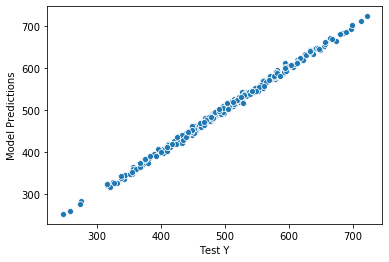

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [66]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\ayushjain9\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

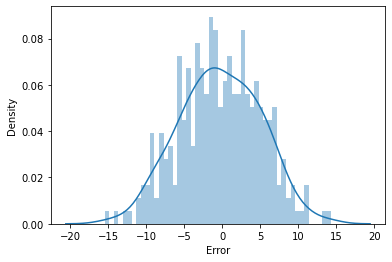

In [67]:
sns.distplot(pred_df['Error'],bins=50)

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.336102129186877

In [71]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

28.29147044265373

In [48]:
# Essentially the same thing, difference just due to precision
test_score

29.112792053222655

In [49]:
#RMSE
test_score**0.5

5.3956271232566335

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

array([[421.31326]], dtype=float32)

## Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
later_model = load_model('my_model.h5')

In [57]:
later_model.predict(new_gem)

array([[421.31326]], dtype=float32)